## You should be using @wraps when you create your own decorator in order to keep the metadata !!!!!

In [ ]:
from collections import defaultdict, namedtuple
from datetime import datetime
from functools import wraps

def function_stats():
    d = defaultdict(lambda: {"count": 0, "first_called": datetime.utcnow()})
    Stats = namedtuple('Stats', 'decorator data')
    
    def decorator(fn):
        @wraps(fn)
        def wrapper(*args, **kwargs):
            d[fn.__name__]['count'] += 1
            return fn(*args, **kwargs)
        return wrapper
    
    return Stats(decorator, d)  

## SEE PROPERTY AND DESCRIPTORS ALSO!!!

## NESTED CLOSURES FOR DECORATORS

## Nice sites

- https://www.pythoncontent.com/understanding-functools-wraps-in-python/
- https://www.pythoncontent.com/decorators-in-python/
- https://www.pythoncontent.com/decorators-with-arguments/

## FUNCTOOLS AND WRAPS
https://www.pythoncontent.com/understanding-functools-wraps-in-python/

## A1. Definition

In [4]:
def my_func():
    print('Hello there!')
    
def decorate(func):
    def dec_func():
        print('Decorated by Theo :)')
        func()
        
    return dec_func

my_func = decorate(my_func)
my_func

<function __main__.decorate.<locals>.dec_func()>

In [5]:
my_func()

Decorated by Theo :)
Hello there!


### Same as

In [6]:
@decorate  #equivalent to my_func = decorate(my_func)
def my_func():
    print('Hello there!')

In [7]:
my_func()

Decorated by Theo :)
Hello there!


## A2. functools wrap

In [51]:
def my_func():
    '''saying Hello function'''
    print('Hello there!')
    
def decorate(func):
    print('passed function name {}'.format(func.__name__))
    def wrapper():
        '''decorating function by Theo'''
        print('Decorated by Theo :)')
        func()
    print('returned function name {}'.format(wrapper.__name__))
    return wrapper

@decorate
def my_func():
    print('Hello there!')

passed function name my_func
returned function name wrapper


In [52]:
my_func.__name__  #notice how the name is dec_func and NOT my_func!!!

'wrapper'

In [53]:
my_func.__doc__

'decorating function by Theo'

In [54]:
my_func.__annotations__

{}

In [ ]:
## inner is a closure and has a reference to the undecorated function fn and fn is the free variable

## To retain the original function attributes 
- you can manually cope the attributes or 
- use the **@wraps from functools module.**

In [56]:
def my_func():
    '''saying Hello function'''
    print('Hello there!')
    
def decorate(func):
    print('passed function name {}'.format(func.__name__))
    def wrapper():
        '''decorating function by Theo'''
        print('Decorated by Theo :)')
        func()
        
    #manually copy metadata
    wrapper.__name__ = func.__name__
    wrapper.__doc__ = func.__doc__
    wrapper.__annotations__ = func.__annotations__
    
    print('returned function name {}'.format(wrapper.__name__))
    return wrapper

@decorate
def my_func():
    print('Hello there!')

passed function name my_func
returned function name my_func


In [57]:
print(my_func.__name__)
print(my_func.__doc__)
print(my_func.__annotations__)

my_func
None
{}


## Using the @wraps

In [80]:
from functools import wraps

def mydecorator(func):
    @wraps(func)
    def wrapper(*args,**kwargs):
        "i am wrapper"
        print('inside wrapper')
        return func(*args,**kwargs)
    return wrapper

#apply decorator on function
@mydecorator
def add(a:int,b:int)->"a+b":
   "adds 2 integers a and b"
   return a+b

#print function metadata
print("Name       :{}".format(add.__name__))
print("Doc        :{}".format(add.__doc__))
print("Annotations:{}".format(add.__annotations__))
print("\nhelp:")
help(add)

Name       :add
Doc        :adds 2 integers a and b
Annotations:{'a': <class 'int'>, 'b': <class 'int'>, 'return': 'a+b'}

help:
Help on function add in module __main__:

add(a: int, b: int) -> 'a+b'
    adds 2 integers a and b



In [81]:
add.__wrapped__

<function __main__.add(a: int, b: int) -> 'a+b'>

In [82]:
add.__wrapped__.__name__

'add'

In [83]:
add.__wrapped__.__doc__

'adds 2 integers a and b'

In [84]:
add.__wrapped__.__annotations__

{'a': int, 'b': int, 'return': 'a+b'}

In [87]:
add(5,20)

inside wrapper


25

In [88]:
add.__wrapped__(5,20)

25

## A.3 Decorator with arguments to make it more customizable

## https://www.pythoncontent.com/decorators-with-arguments/


@decoratorarg(arg1,arg2,..) <br>
def func(): <br>
$ \,\,\,$    pass

#above representation is equivalent to <br>
func=decoratorarg(arg1,arg2,..)(func)

## Decorator Factory

In [89]:
def decorator_factory(arg1, arg2):
    
    def decorator(func):
        
        return arg1*func+arg2*func
    
    return decorator

In [ ]:
def sum_func(a,b):
    return a+b

### https://www.youtube.com/watch?v=KlBPCzcQNU8&list=PL-osiE80TeTt2d9bfVyTiXJA-UTHn6WwU&index=38

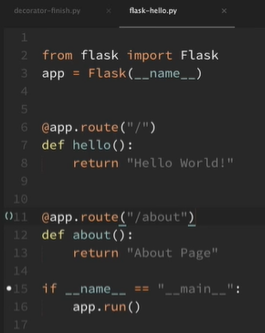

In [ ]:
func=(decoratorarg(arg1,arg2,..))(func)

#if decoratorarg returns decorator
decorator=decoratorarg(arg1,arg2,..)

func=decorator(func)

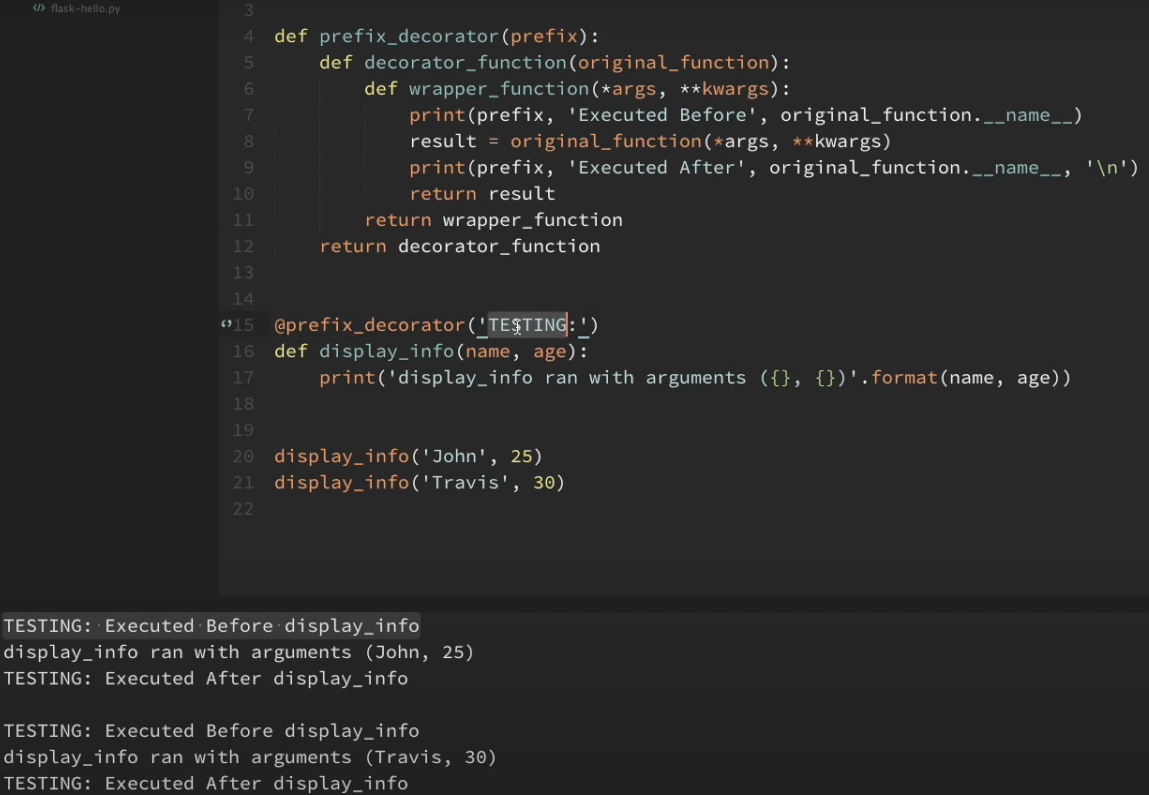

## https://www.pythoncontent.com/decorators-with-arguments/

In [ ]:
import logging,datetime
logging.basicConfig(level=logging.DEBUG)

#decorator with arguments
def debug(pattern=""):
   def logger(func):
       #decorator logs function call with arguments
       def wraper(*args,**kwargs):
           logging.debug(pattern+str(func.__name__)+" called with argument "+str(args)+" @"+str(datetime.datetime.now().time())+pattern)
           return func(*args,**kwargs)
       return wraper
   return logger

#pass the argument to decorator
@debug("***")
def func1(n):
    pass

@debug("$$$")
def func2(n):
    pass


#decorator with default parameters    
@debug()
def func3(m):
    pass

func1(2)
func2(3)
func3(4)

In [ ]:
#decorator to add and initialize attributes to function
def addattributes(**kwargs):
    def decorate(func):
        for args in kwargs:
            #add passed arguments to function
            setattr(func, args, kwargs[args])
        return func
    return decorate

@addattributes(counter=0,increment=1)
def func():
    pass

print("func.counter = {} func.increment = {}".format(func.counter,func.increment))

# Memoization

- https://www.pythoncontent.com/memoization-in-python/

Memoization is an optimization technique used primarily to speed up computer programs by storing the results of function calls and returning the cached result when the same inputs occur again.



In [102]:
def fibonacci(n):
    if n==0:
        return 0
    elif n==1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

In [108]:
import time
start_time = time.time()
print(fibonacci(35))
print("--- %s seconds ---" % (time.time() - start_time))

9227465
--- 3.500875473022461 seconds ---


In [ ]:
%timeit fibonacci(14)

In [109]:
import time
start_time = time.time()
print(fibonacci(36))
print("--- %s seconds ---" % (time.time() - start_time))

14930352
--- 5.649221420288086 seconds ---


In [110]:
import time
start_time = time.time()
print(fibonacci(37))
print("--- %s seconds ---" % (time.time() - start_time))

24157817
--- 9.07297134399414 seconds ---


In [111]:
3.500875473022461 + 5.649221420288086 + 9.07297134399414

18.223068237304688

In [112]:
def memoization(func):
    history={}
    def inner(n):
        if n not in history:
            history[n] = func(n)
        return history[n]
    return inner

In [113]:
@memoization
def fibonacci(n):
    if n==0:
        return 0
    elif n==1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

In [95]:
%timeit fibonacci(10)

117 ns ± 5.37 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [96]:
%timeit fibonacci(14)

112 ns ± 3.84 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [114]:
import time
start_time = time.time()
print(fibonacci(35))
print(fibonacci(36))
print(fibonacci(37))
print("--- %s seconds ---" % (time.time() - start_time))

9227465
14930352
24157817
--- 0.0 seconds ---


# Memoization with class decorators

In [ ]:
#Memoize implementation using class
class Memoize:
    def __init__(self, func):
        self.func = func
        #history dictionary to store past results
        self.history = {}
        
    #__call__ to implement Memoization    
    def __call__(self, *args):
        if args not in self.history:
            self.history[args] = self.func(*args)
        return self.history[args]
        
@Memoize
#function returns nth fibonacci number
def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

print("20th fibonacci number is {}".format(fibonacci(20)))
print("10th fibonacci number is {}".format(fibonacci(10)))

## On the difference between Decorator class and Decorator Function

- https://stackoverflow.com/questions/4650333/difference-between-decorator-classes-and-decorator-functions

# Applications

### 1. Smart divide

In [13]:
import numpy as np

In [37]:
def division(a:float,b:float)->"a+b":
    '''Summing 2 float numbers'''
    return a/b

def smart_divide(func):
    '''Extending to division by zero'''
    def inner(a:float,b:float)->"a+b or inf or not defined":
        '''inner function handling dividing by zero'''
        if b==0:
            if a>0:
                return np.inf
            elif a<0:
                return -np.inf
            else:
                print('0/0 is not defined')
                return          
        return func(a,b)
    
    return inner

In [38]:
print(division.__name__)
print(division.__doc__)
print(division.__annotations__)

division
Summing 2 float numbers
{'a': <class 'float'>, 'b': <class 'float'>, 'return': 'a+b'}


In [39]:
division(2, 0)

ZeroDivisionError: division by zero

In [40]:
@smart_divide
def division(a,b):
    return a/b

In [41]:
print(division.__name__)
print(division.__doc__)
print(division.__annotations__)

inner
inner function handling dividing by zero
{'a': <class 'float'>, 'b': <class 'float'>, 'return': 'a+b or inf or not defined'}


In [42]:
division(2,0)

inf

In [43]:
division(-2,0)

-inf

In [44]:
division(0,0)

0/0 is not defined


In [45]:
division(2,3)

0.6666666666666666

### 2. Adding more arguments to an existing function

In [ ]:
def sum_func(a,b):
    return a+b

def multisum(func):
    
    def inner(*args):
        sum_ =  
        for arg in args:
            sum_ += sum_
    
    func()
    
    return inner

### 3. Decorator with arguments